In [24]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import xgboost as xgb
import lightgbm as lgbm

In [25]:
data=pd.read_csv('dataset/train.csv')
data_np=np.array(data)
X=data_np[:,1:-1]
y_pre=data_np[:,-1]

In [45]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(y_pre))
y=le.transform(y_pre)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
data_np[:,1:].shape

(61878, 94)

In [44]:
# #K-fold cross validation split
# X,y = sklearn.utils.shuffle(X,y)
# kf = KFold(5,shuffle=False)
# kf.get_n_splits(X)

# list_prob=[]
# for train_index,test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], X[train_index]
    
#     clf_logistic = sklearn.linear_model.LogisticRegression(random_state=0).fit(X_train,y_train)
#     logistic_accuracy = clf_logistic.score(X_test,y_test)
#     logistic_log_loss = sklearn.metrics.log_loss(y_test, clf_logistic.predict_proba(X_test))
#     print('Logloss is ',logistic_log_loss)
#     list_prob.append(logistic_log_loss)
    
    

/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: Found input variables with inconsistent numbers of samples: [49502, 12376]

(array([ 1530., 12944.,  6443.,  2153.,     0.,  2174., 11251.,  2287.,
         6790.,  3930.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

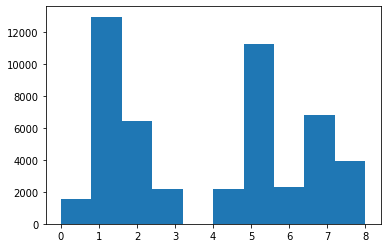

In [4]:
plt.hist(y_train)

# Random forest

In [5]:
clf = RandomForestClassifier(max_depth=10, random_state=2)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7678571428571429

In [6]:
clf.predict_proba(X_test)

array([[0.06490965, 0.25501547, 0.14907195, ..., 0.08376932, 0.06689077,
        0.04719386],
       [0.0268758 , 0.14162775, 0.05081799, ..., 0.4892125 , 0.13190942,
        0.10729225],
       [0.02533418, 0.01191287, 0.00804023, ..., 0.01963451, 0.02207811,
        0.01915134],
       ...,
       [0.3       , 0.        , 0.        , ..., 0.        , 0.1       ,
        0.525     ],
       [0.00633374, 0.73957007, 0.1678721 , ..., 0.00810614, 0.0087625 ,
        0.00909745],
       [0.01575013, 0.03273587, 0.01683241, ..., 0.50297848, 0.29587521,
        0.01574389]])

In [7]:
sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))

0.7396735462971555

# Logistic regression

In [8]:
clf_logistic = sklearn.linear_model.LogisticRegression(random_state=0).fit(X_train,y_train)
logistic_accuracy = clf_logistic.score(X_test,y_test)
logistic_log_loss = sklearn.metrics.log_loss(y_test, clf_logistic.predict_proba(X_test))
print('Logloss is ',logistic_log_loss)

/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logloss is  0.6699873045491103


# KNN

In [9]:
clf_knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
knn_accuracy = clf_knn.score(X_test,y_test)
knn_log_loss = sklearn.metrics.log_loss(y_test, clf_knn.predict_proba(X_test))
print('Logloss is ',knn_log_loss)

Logloss is  2.3086776076579794


In [10]:
knn_accuracy

0.7807045895281189

# SVM Linear

In [38]:
clf_svm = sklearn.svm.SVC(probability=True,kernel='linear').fit(X_train,y_train)
svm_accuracy = clf_svm.score(X_test,y_test)
svm_log_loss = sklearn.metrics.log_loss(y_test, clf_svm.predict_proba(X_test))

In [39]:
sklearn.metrics.log_loss(y_test, clf_svm.predict_proba(X_test))

0.6298349235521797

# SVM Radial

# XGBoost

In [30]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)

In [34]:
param = {'max_depth':8, 'eta':1, 'objective':'multi:softprob', 'num_class': 9}
num_round = 40
bst = xgb.train(param, dtrain, num_round)
#sklearn.metrics.accuracy_score(y_test,bst.predict(dtest))
sklearn.metrics.log_loss(y_test, bst.predict(dtest))

0.569466574998273

# Stack Different Models

Try out first with logistic, random forest and XGboost.

In [132]:
#this time split data in 3 chunks - train, stack train, test (60%, 20%, 20%)
data=pd.read_csv('train.csv')
data_np=np.array(data)
X=data_np[:,1:-1]
y_pre=data_np[:,-1]

le = preprocessing.LabelEncoder()
le.fit(np.unique(y_pre))
y=le.transform(y_pre)

#get the first split
X_temp, X_test, y_temp, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=41)

X_train, X_stack, y_train, y_stack = sklearn.model_selection.train_test_split(X_temp,y_temp, test_size=0.25, random_state=41)

Get some models trained on the train set and then make predictions both for stack and test set

In [138]:
clf_logistic = sklearn.linear_model.LogisticRegression(random_state=0).fit(X_train,y_train)
logistic_pred_test = clf_logistic.predict(X_test)
logistic_pred_stack = clf_logistic.predict(X_stack)
logistic_log_loss = sklearn.metrics.log_loss(y_test, clf_logistic.predict_proba(X_test))
print('Logistic logloss is ',logistic_log_loss)

Logistic logloss is  0.631577644078975


/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
644

In [139]:
clf_rf = RandomForestClassifier(max_depth=20, random_state=2, n_estimators=200)
clf_rf.fit(X_train, y_train)
rf_pred_test = clf_rf.predict(X_test)
rf_pred_stack = clf_rf.predict(X_stack)
rf_log_loss = sklearn.metrics.log_loss(y_test, clf_rf.predict_proba(X_test))
print('Random forest logloss is ', rf_log_loss)


Random forest logloss is  0.6672842405993349


In [ ]:
6711

In [137]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dstack=xgb.DMatrix(X_stack,label=y_stack)
dtest=xgb.DMatrix(X_test,label=y_test)
param = {'max_depth':8, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9}
num_round = 80
bst = xgb.train(param, dtrain, num_round)
xgb_pred_test = bst.predict(dtest)
xgb_pred_stack = bst.predict(dstack)
sklearn.metrics.log_loss(y_test, bst.predict(dtest))

0.5211507044275507

In [ ]:
5343

In [140]:
param = {'max_depth':4, 'eta':1, 'objective':'multi:softprob', 'num_class': 9}
bst2 = xgb.train(param, dtrain, num_round)
xgb2_pred_test = bst2.predict(dtest)
xgb2_pred_stack = bst2.predict(dstack)
sklearn.metrics.log_loss(y_test, bst2.predict(dtest))

0.536334284662629

In [ ]:
5545

In [141]:
param = {'max_depth':12, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9}
bst3 = xgb.train(param, dtrain, num_round)
xgb3_pred_test = bst3.predict(dtest)
xgb3_pred_stack = bst3.predict(dstack)
sklearn.metrics.log_loss(y_test, bst3.predict(dtest))

0.49655430405301737

In [ ]:
5069

In [142]:
param = {'max_depth':9, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9, 'n_estimators': 400,
         'subsample': 0.8, 'gamma': 1, 'min_child_weight': 0.8, 'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8, }
bst4 = xgb.train(param, dtrain, 400)
xgb4_pred_test = bst4.predict(dtest)
xgb4_pred_stack = bst4.predict(dstack)
print('Train set error ',sklearn.metrics.log_loss(y_train, bst4.predict(dtrain)))
print('Test set error ',sklearn.metrics.log_loss(y_test, bst4.predict(dtest)))

Train set error  0.17525186159464382
Test set error  0.4591945110461338


In [ ]:
4694

In [143]:
#LightGBM
clf_lgbm = lgbm.LGBMClassifier(num_leaves=50).fit(X_train, y_train)
print('Train set error ',sklearn.metrics.log_loss(y_train, clf_lgbm.predict_proba(X_train)))
sklearn.metrics.log_loss(y_test,clf_lgbm.predict_proba(X_test))

Train set error  0.30539586550667924


0.4912138850186399

In [ ]:
4972

In [135]:
clf_lgbm2 = lgbm.LGBMClassifier(num_leaves=70).fit(X_train, y_train)
sklearn.metrics.log_loss(y_test,clf_lgbm2.predict_proba(X_test))

0.4830322590837645

In [ ]:
487

In [153]:
#LightGBM
clf_lgbm3 = lgbm.LGBMClassifier(num_leaves=100).fit(X_train, y_train)
sklearn.metrics.log_loss(y_test,clf_lgbm3.predict_proba(X_test))

0.47636401218787144

In [ ]:
4831

In [159]:
parameters = {
    #'application': 'sigmoid',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'num_class':9,
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.03,
    'verbose': 0
}

train_data = lgbm.Dataset(X_train, label=y_train)
test_data = lgbm.Dataset(X_test, label=y_test)

model2 = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=200)

[1]	valid_0's multi_logloss: 1.90127
Training until validation scores don't improve for 200 rounds
[2]	valid_0's multi_logloss: 1.85721
[3]	valid_0's multi_logloss: 1.81647
[4]	valid_0's multi_logloss: 1.77461
[5]	valid_0's multi_logloss: 1.74133
[6]	valid_0's multi_logloss: 1.70868
[7]	valid_0's multi_logloss: 1.67894
[8]	valid_0's multi_logloss: 1.64423
[9]	valid_0's multi_logloss: 1.6139
[10]	valid_0's multi_logloss: 1.58606
[11]	valid_0's multi_logloss: 1.55783
[12]	valid_0's multi_logloss: 1.53241
[13]	valid_0's multi_logloss: 1.5083
[14]	valid_0's multi_logloss: 1.48502
[15]	valid_0's multi_logloss: 1.46146
[16]	valid_0's multi_logloss: 1.44044
[17]	valid_0's multi_logloss: 1.42144
[18]	valid_0's multi_logloss: 1.40241
[19]	valid_0's multi_logloss: 1.38233
[20]	valid_0's multi_logloss: 1.36184
[21]	valid_0's multi_logloss: 1.3444
[22]	valid_0's multi_logloss: 1.32594
[23]	valid_0's multi_logloss: 1.30897
[24]	valid_0's multi_logloss: 1.29226
[25]	valid_0's multi_logloss: 1.27543


[209]	valid_0's multi_logloss: 0.568855
[210]	valid_0's multi_logloss: 0.568119
[211]	valid_0's multi_logloss: 0.567399
[212]	valid_0's multi_logloss: 0.566711
[213]	valid_0's multi_logloss: 0.566121
[214]	valid_0's multi_logloss: 0.565447
[215]	valid_0's multi_logloss: 0.564726
[216]	valid_0's multi_logloss: 0.564043
[217]	valid_0's multi_logloss: 0.563399
[218]	valid_0's multi_logloss: 0.56275
[219]	valid_0's multi_logloss: 0.562027
[220]	valid_0's multi_logloss: 0.561457
[221]	valid_0's multi_logloss: 0.560781
[222]	valid_0's multi_logloss: 0.560191
[223]	valid_0's multi_logloss: 0.559549
[224]	valid_0's multi_logloss: 0.558879
[225]	valid_0's multi_logloss: 0.558233
[226]	valid_0's multi_logloss: 0.557555
[227]	valid_0's multi_logloss: 0.556841
[228]	valid_0's multi_logloss: 0.556165
[229]	valid_0's multi_logloss: 0.555555
[230]	valid_0's multi_logloss: 0.554944
[231]	valid_0's multi_logloss: 0.55439
[232]	valid_0's multi_logloss: 0.553785
[233]	valid_0's multi_logloss: 0.553208
[2

[415]	valid_0's multi_logloss: 0.496748
[416]	valid_0's multi_logloss: 0.496586
[417]	valid_0's multi_logloss: 0.496511
[418]	valid_0's multi_logloss: 0.496369
[419]	valid_0's multi_logloss: 0.4962
[420]	valid_0's multi_logloss: 0.496016
[421]	valid_0's multi_logloss: 0.49584
[422]	valid_0's multi_logloss: 0.495705
[423]	valid_0's multi_logloss: 0.495539
[424]	valid_0's multi_logloss: 0.495429
[425]	valid_0's multi_logloss: 0.495269
[426]	valid_0's multi_logloss: 0.495094
[427]	valid_0's multi_logloss: 0.494923
[428]	valid_0's multi_logloss: 0.49478
[429]	valid_0's multi_logloss: 0.49466
[430]	valid_0's multi_logloss: 0.494558
[431]	valid_0's multi_logloss: 0.494434
[432]	valid_0's multi_logloss: 0.494273
[433]	valid_0's multi_logloss: 0.494145
[434]	valid_0's multi_logloss: 0.493949
[435]	valid_0's multi_logloss: 0.493793
[436]	valid_0's multi_logloss: 0.493689
[437]	valid_0's multi_logloss: 0.493547
[438]	valid_0's multi_logloss: 0.493425
[439]	valid_0's multi_logloss: 0.493286
[440]

[623]	valid_0's multi_logloss: 0.474939
[624]	valid_0's multi_logloss: 0.474887
[625]	valid_0's multi_logloss: 0.474839
[626]	valid_0's multi_logloss: 0.474733
[627]	valid_0's multi_logloss: 0.474686
[628]	valid_0's multi_logloss: 0.474605
[629]	valid_0's multi_logloss: 0.474531
[630]	valid_0's multi_logloss: 0.474475
[631]	valid_0's multi_logloss: 0.47444
[632]	valid_0's multi_logloss: 0.474393
[633]	valid_0's multi_logloss: 0.474318
[634]	valid_0's multi_logloss: 0.474229
[635]	valid_0's multi_logloss: 0.474179
[636]	valid_0's multi_logloss: 0.474102
[637]	valid_0's multi_logloss: 0.474079
[638]	valid_0's multi_logloss: 0.474059
[639]	valid_0's multi_logloss: 0.473999
[640]	valid_0's multi_logloss: 0.473968
[641]	valid_0's multi_logloss: 0.473912
[642]	valid_0's multi_logloss: 0.473867
[643]	valid_0's multi_logloss: 0.473806
[644]	valid_0's multi_logloss: 0.473799
[645]	valid_0's multi_logloss: 0.473743
[646]	valid_0's multi_logloss: 0.473723
[647]	valid_0's multi_logloss: 0.473631
[

[830]	valid_0's multi_logloss: 0.465217
[831]	valid_0's multi_logloss: 0.465233
[832]	valid_0's multi_logloss: 0.465216
[833]	valid_0's multi_logloss: 0.465178
[834]	valid_0's multi_logloss: 0.465149
[835]	valid_0's multi_logloss: 0.465137
[836]	valid_0's multi_logloss: 0.465123
[837]	valid_0's multi_logloss: 0.465101
[838]	valid_0's multi_logloss: 0.46508
[839]	valid_0's multi_logloss: 0.465045
[840]	valid_0's multi_logloss: 0.46505
[841]	valid_0's multi_logloss: 0.464974
[842]	valid_0's multi_logloss: 0.464934
[843]	valid_0's multi_logloss: 0.46494
[844]	valid_0's multi_logloss: 0.464939
[845]	valid_0's multi_logloss: 0.464925
[846]	valid_0's multi_logloss: 0.464902
[847]	valid_0's multi_logloss: 0.464858
[848]	valid_0's multi_logloss: 0.464812
[849]	valid_0's multi_logloss: 0.464783
[850]	valid_0's multi_logloss: 0.464773
[851]	valid_0's multi_logloss: 0.464768
[852]	valid_0's multi_logloss: 0.464714
[853]	valid_0's multi_logloss: 0.464703
[854]	valid_0's multi_logloss: 0.464679
[85

[1038]	valid_0's multi_logloss: 0.461542
[1039]	valid_0's multi_logloss: 0.461526
[1040]	valid_0's multi_logloss: 0.461504
[1041]	valid_0's multi_logloss: 0.461504
[1042]	valid_0's multi_logloss: 0.461477
[1043]	valid_0's multi_logloss: 0.461483
[1044]	valid_0's multi_logloss: 0.461457
[1045]	valid_0's multi_logloss: 0.46141
[1046]	valid_0's multi_logloss: 0.461388
[1047]	valid_0's multi_logloss: 0.461389
[1048]	valid_0's multi_logloss: 0.46139
[1049]	valid_0's multi_logloss: 0.461382
[1050]	valid_0's multi_logloss: 0.461396
[1051]	valid_0's multi_logloss: 0.461333
[1052]	valid_0's multi_logloss: 0.461279
[1053]	valid_0's multi_logloss: 0.461265
[1054]	valid_0's multi_logloss: 0.461224
[1055]	valid_0's multi_logloss: 0.461184
[1056]	valid_0's multi_logloss: 0.461171
[1057]	valid_0's multi_logloss: 0.461172
[1058]	valid_0's multi_logloss: 0.461174
[1059]	valid_0's multi_logloss: 0.461125
[1060]	valid_0's multi_logloss: 0.461142
[1061]	valid_0's multi_logloss: 0.461124
[1062]	valid_0's m

[1242]	valid_0's multi_logloss: 0.459997
[1243]	valid_0's multi_logloss: 0.460017
[1244]	valid_0's multi_logloss: 0.460035
[1245]	valid_0's multi_logloss: 0.460075
[1246]	valid_0's multi_logloss: 0.460091
[1247]	valid_0's multi_logloss: 0.4601
[1248]	valid_0's multi_logloss: 0.460105
[1249]	valid_0's multi_logloss: 0.460097
[1250]	valid_0's multi_logloss: 0.460127
[1251]	valid_0's multi_logloss: 0.460161
[1252]	valid_0's multi_logloss: 0.460171
[1253]	valid_0's multi_logloss: 0.46021
[1254]	valid_0's multi_logloss: 0.460244
[1255]	valid_0's multi_logloss: 0.460241
[1256]	valid_0's multi_logloss: 0.460274
[1257]	valid_0's multi_logloss: 0.4603
[1258]	valid_0's multi_logloss: 0.460326
[1259]	valid_0's multi_logloss: 0.460365
[1260]	valid_0's multi_logloss: 0.460387
[1261]	valid_0's multi_logloss: 0.460337
[1262]	valid_0's multi_logloss: 0.46033
[1263]	valid_0's multi_logloss: 0.460317
[1264]	valid_0's multi_logloss: 0.460268
[1265]	valid_0's multi_logloss: 0.460291
[1266]	valid_0's multi

In [ ]:
4597

In [133]:
#LightGBM
clf_lgbm4 = lgbm.LGBMClassifier(num_leaves=150, learning_rate=0.05, num_iterations=200).fit(X_train, y_train)
print('Train set error ',sklearn.metrics.log_loss(y_train, clf_lgbm4.predict_proba(X_train)))
print('Test set error ',sklearn.metrics.log_loss(y_test,clf_lgbm4.predict_proba(X_test)))

/Users/petar.hristov/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Train set error  0.13527320124529696
Test set error  0.47433457033818743


In [ ]:
47957

In [14]:
#create features for our stack
#feat_size = len(y_test)
#X_stack_feat = np.hstack((logistic_pred_stack.reshape((feat_size,1)),rf_pred_stack.reshape((feat_size,1)),xgb_pred_stack.reshape((feat_size,1))))
#X_test_feat = np.hstack((logistic_pred_test.reshape((feat_size,1)),rf_pred_test.reshape((feat_size,1)),xgb_pred_test.reshape((feat_size,1))))

In [165]:
X_stack_feat=np.column_stack((clf_rf.predict_proba(X_stack),clf_logistic.predict_proba(X_stack),xgb_pred_stack,xgb2_pred_stack,xgb3_pred_stack,xgb4_pred_stack,clf_lgbm.predict_proba(X_stack),clf_lgbm2.predict_proba(X_stack),clf_lgbm3.predict_proba(X_stack),clf_lgbm4.predict_proba(X_stack),model2.predict(X_stack)))
X_test_feat=np.column_stack((clf_rf.predict_proba(X_test),clf_logistic.predict_proba(X_test),xgb_pred_test,xgb2_pred_test,xgb3_pred_test,xgb4_pred_test,clf_lgbm.predict_proba(X_test),clf_lgbm2.predict_proba(X_test),clf_lgbm3.predict_proba(X_test),clf_lgbm4.predict_proba(X_test),model2.predict(X_test)))


In [74]:
X_stack_feat=np.column_stack((clf_lgbm.predict_proba(X_stack),clf_lgbm2.predict_proba(X_stack),clf_lgbm3.predict_proba(X_stack),xgb4_pred_stack))
X_test_feat=np.column_stack((clf_lgbm.predict_proba(X_test),clf_lgbm2.predict_proba(X_test),clf_lgbm3.predict_proba(X_test),xgb4_pred_test))



In [34]:
#stack them using a linear layer
stack_model = sklearn.linear_model.LogisticRegression(max_iter=200) #penalty='none',solver='newton-cg')
#stack_model = sklearn.svm.SVC(probability=True)
#stack_model = sklearn.svm.SVC(probability=True)
stack_model.fit(X_stack_feat,y_stack)
final_proba = stack_model.predict_proba(X_test_feat)

In [166]:
dtrain1=xgb.DMatrix(X_stack_feat,label=y_stack)
dtest1=xgb.DMatrix(X_test_feat,label=y_test)

param = {'max_depth':4, 'eta':0.05, 'objective':'multi:softprob', 'num_class': 9,'gamma': 3}
num_round = 200
bst = xgb.train(param, dtrain1, num_round)

print(sklearn.metrics.log_loss(y_stack, bst.predict(dtrain1)))
print(sklearn.metrics.log_loss(y_test, bst.predict(dtest1)))

0.3462388454808798
0.4560690215149626


In [ ]:
4653 #4589 without lgbm at 4597

In [171]:
some_model=xgb.XGBClassifier(colsamplebytree=0.8, gamma=1.7, 
learningrate=0.0825, eta=10**(-1.7), maxdepth=110, 
minchildweight=1.5,
objective='multi:softprob', seed=42,subsample=0.8, num_boost_round=4500)

some_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsamplebytree=0.8,
              eta=0.0199526231496888, gamma=1.7, learning_rate=0.1,
              learningrate=0.0825, max_delta_step=0, max_depth=3, maxdepth=110,
              min_child_weight=1, minchildweight=1.5, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_boost_round=4500,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=None,
              subsample=0.8, verbosity=1)

In [172]:
print(sklearn.metrics.log_loss(y_test, some_model.predict_proba(X_test)))

0.6391703847051442


# Grid search

In [83]:
num_round=150
param = [{'max_depth':4, 'eta':0.02, 'objective':'multi:softprob', 'num_class': 9, 'n_estimators': 400,
         'subsample': 0.8, 'gamma': 1, 'min_child_weight': 0.8, 'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8, },
         {'max_depth':4, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9, 'n_estimators': 400,
         'subsample': 0.8, 'gamma': 0.8, 'min_child_weight': 0.8, 'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8, },
         {'max_depth':7, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9, 'n_estimators': 400,
         'subsample': 0.8, 'gamma': 1, 'min_child_weight': 0.8, 'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8, },
         {'max_depth':9, 'eta':0.1, 'objective':'multi:softprob', 'num_class': 9, 'n_estimators': 600,
         'subsample': 0.8, 'gamma': 1, 'min_child_weight': 0.8, 'colsample_bylevel': 0.8,
        'colsample_bytree': 0.8, }]
list_class=[]
for i in param:
    list_class.append(xgb.train(i,dtrain1,num_round))

In [85]:
for i in range(4):
    print(sklearn.metrics.log_loss(y_test, list_class[i].predict(dtest1)))

0.5421125721770358
0.46967874023492445
0.48613076667306643
0.4904737766782054


In [ ]:
4682

In [35]:
sklearn.metrics.log_loss(y_test, final_proba)

0.5012706479395326